In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import fft
from scipy import signal
from matplotlib.colors import Normalize

### General Functions

In [2]:
def Adapt_function(Stim_value, alpha, x0, b):
    v_ = (alpha*0.5*(np.tanh(Stim_value - x0) + 1) ) - b
    v_ = np.where(v_<0, 0, v_)
    return v_

In [3]:
def Visualize_adaptation():
    plt.figure(figsize = (8, 6))
    Stim_array = np.arange(-2, 4,0.1)
    v_ = Adapt_function(Stim_array, 1, 0, 0)
    plt.plot(Stim_array, v_, label = r'original $ r(x) =  \alpha \left[ \frac{\tanh(x - x_0) + 1}{2} \right] + b$, with,  $[x_0, \alpha, b] = [0, 1, 0]$' )
    for par_case in range(3):
        alpha = 1
        b = 0
        x0 = 0
        if par_case == 0:  
            x0 = 2
            v_ = Adapt_function(Stim_array, alpha, x0, b)
            plt.plot(Stim_array, v_, label = str(string[par_case])+r', with $x_0 =$ '+str(x0))
        if par_case == 1:
            alpha = 0.5 
            v_ = Adapt_function(Stim_array, alpha, x0, b)
            plt.plot(Stim_array, v_, label = str(string[par_case])+r', with $\alpha =$ '+str(alpha))
        if par_case == 2:
            b = 0.4
            v_ = Adapt_function(Stim_array, alpha, x0, b)
            plt.plot(Stim_array, v_, label = str(string[par_case])+r', with $b =$ '+str(b))
    plt.ylabel("Response", fontsize = 12)
    plt.xlabel("Stimulus array", fontsize = 12)
    plt.legend(fontsize = 11)
    plt.tick_params(labelsize = 12)
    plt.show()

In [4]:
def Visualize_responses():
    Fig, ax = plt.subplots(1, 2, figsize = (10, 4))
    ax[0].plot(t_array, Response, label = 'Ex. rate', c = 'darkred')
    ax[0].plot(t_array, Response_inh, label = 'Inh. rate', c = 'darkblue')
    ax[1].plot(t_array, Calcium_response, marker = '.' , c = 'k', label = 'Calcium response')
    ax[0].plot(np.array([0,1]), np.array([-0.01,-0.01]), linewidth = 3, c = 'green')
    ax[0].plot(np.array([1,2]), np.array([-0.01,-0.01]), linewidth = 3, c = 'orange')
    ax[0].plot(np.array([2,4]), np.array([-0.01,-0.01]), linewidth = 3, c = 'k')
    ax[1].plot(np.array([0,1]), np.array([-0.001,-0.001]), linewidth = 3, c = 'green')
    ax[1].plot(np.array([1,2]), np.array([-0.001,-0.001]), linewidth = 3, c = 'orange')
    ax[1].plot(np.array([2,4]), np.array([-0.001,-0.001]), linewidth = 3, c = 'k')
    ax[1].axhline(y = 0.05, color = 'k', linestyle = '-.', label = 'Response before adaptation')
    ax[0].axhline(y = rb_or, color = 'k', linestyle = '-.', label = 'Ex. rate before adaptation')
    ax[0].set_ylabel("Firing rate", fontsize = 12)
    ax[1].set_ylabel("Calcium response", fontsize = 12)
    ax[0].set_xlabel("Time (s)", fontsize = 12)
    ax[1].set_xlabel("Time (s)", fontsize = 12)
    ax[0].legend(fontsize = 11)
    ax[1].legend(fontsize = 11)
    ax[1].set_ylim(-0.002, 0.09)
    ax[0].set_ylim(-0.02, 1.45)
    ax[0].set_xlim(0, 4)
    ax[1].set_xlim(0, 4)
    plt.show()

#### Firing rate and Calcium response of ORNs

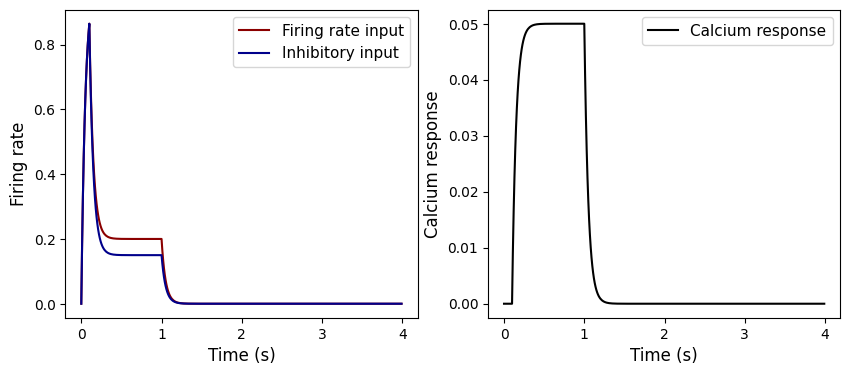

In [5]:
T_max = 4 # Max time (s)
dt = 0.01 
t_array = np.arange(0, T_max, dt) # Time array
N_t = t_array.size 

Tau_rate_inh = 0.05 # Time scale of the inhibitory rate
Tau_rate = 0.05     # Time scale of the excitatory rate
base = 0.2          # Excitatory base rate
v_max = 1           # Firing rate amplitude
base_ca = 0.15      # Inhibitory base rate
peak_firing = 1     # Peak rate at the initial stimulus
# peak_firing = 3     # Peak rate at the initial stimulus


t_stim_adapt = 0.1  # Time at which the firing rate adapts (s)
t_stim_off = 1      # Time at which the stimulus is turned off (s)

Response = np.zeros(N_t)      # Excitatory response
Response_inh = np.zeros(N_t)  # Inhibitory response
idx_stim = np.where(t_array==t_stim_adapt)[0][0]  # at which the response decays to baseline
idx_off = np.where(t_array==t_stim_off)[0][0]     # At which the stimulus is turned-off

Response[:idx_stim] = -peak_firing*np.exp(-t_array[:idx_stim]/Tau_rate) + peak_firing
Response[idx_stim:idx_off] = (-np.exp(-t_array[idx_stim]/Tau_rate) + peak_firing - base)*np.exp(-(t_array[idx_stim:idx_off] - t_array[idx_stim])/Tau_rate) + base
Response[idx_off:] = (-np.exp(-t_array[idx_off]/Tau_rate) + base)*np.exp(-(t_array[idx_off:] - t_array[idx_off])/Tau_rate) 

Response_inh[:idx_stim] = -peak_firing*np.exp(-t_array[:idx_stim]/Tau_rate_inh) + peak_firing
Response_inh[idx_stim:idx_off] = (-np.exp(-t_array[idx_stim]/Tau_rate_inh) + peak_firing - base_ca)*np.exp(-(t_array[idx_stim:idx_off] - t_array[idx_stim])/Tau_rate_inh) + base_ca
Response_inh[idx_off:] = (-np.exp(-t_array[idx_off]/Tau_rate_inh) + base_ca)*np.exp(-(t_array[idx_off:] - t_array[idx_off])/Tau_rate_inh) 

Calcium_response = v_max*(Response - Response_inh) 

Fig, ax = plt.subplots(1, 2, figsize = (10, 4))
ax[0].plot(t_array, v_max*Response, label = 'Firing rate input', c = 'darkred')
ax[0].plot(t_array, v_max*Response_inh, label = 'Inhibitory input', c = 'darkblue')
ax[1].plot(t_array, Calcium_response, label = 'Calcium response', c = 'k')
ax[0].set_ylabel("Firing rate", fontsize = 12)
ax[1].set_ylabel("Calcium response", fontsize = 12)
ax[0].set_xlabel("Time (s)", fontsize = 12)
ax[1].set_xlabel("Time (s)", fontsize = 12)
ax[0].legend(fontsize = 11)
ax[1].legend(fontsize = 11)
plt.show()

#### Different types of adaptation

In [7]:
string = ['shift_x', 'compression', 'shift_y']
#Visualize_adaptation()

#### Adapting the neuron with different background stimuli $x_B$ and using the same test odor value $x_{0}$

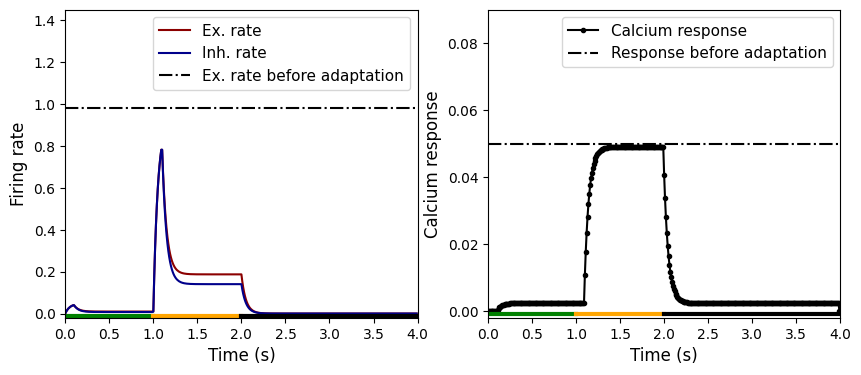

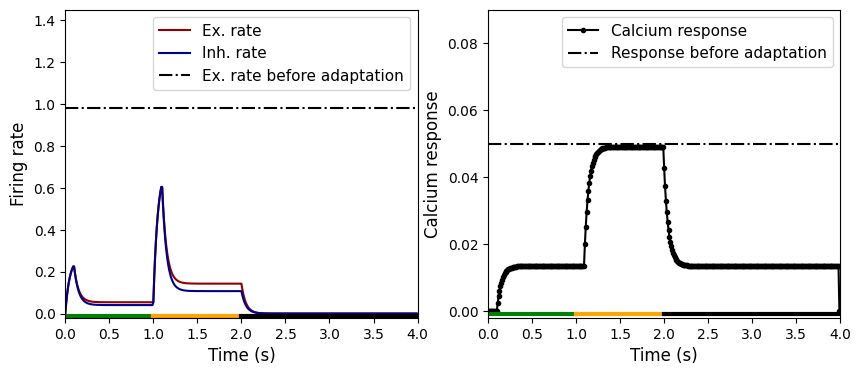

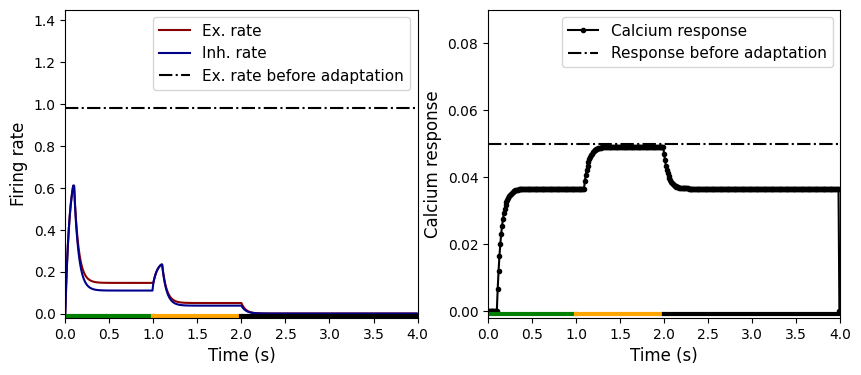

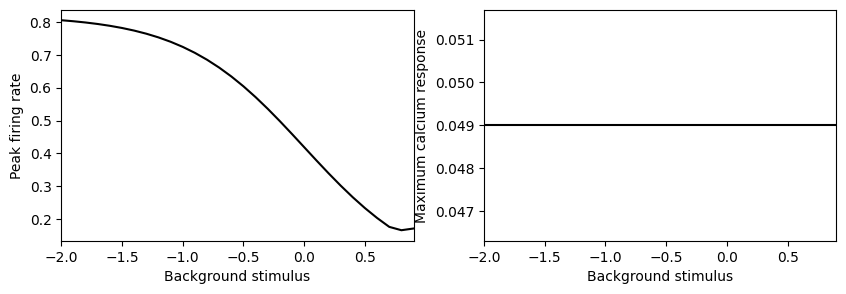

In [10]:
x_b_array = np.arange(-2, 1, 0.1) # Background stimulus array
N_b = x_b_array.size
par_case = 2 # 0:shift x-axis, 1: Compression and 3:shift y-axis
Max_calcium = np.zeros(x_b_array.size) # Max calcium responses
Max_rate = np.zeros(x_b_array.size)    # Max rate responses
counter_b = -1

x_0_ = 2 # Initial stimulus
for x_b in x_b_array: # Adaptation at some stimulus weaker than the initial one.
    counter_b += 1 
    
    x0 = 0
    alpha = 1
    b = 0
    
    v_max_2 = v_max*Adapt_function(x_b, alpha, x0, b) # Response before adaptation for the background stimulus. 
    rb_or = v_max*Adapt_function(x_0_, alpha, x0, b) # Response before adaptation for the test stimulus. 
    
    if par_case == 0:  
        x0 = - np.arctanh( 2*(Adapt_function(x_0_, alpha, x0, b) - Adapt_function(x_b, alpha, x0, b)) - 1 ) + x_0_
        v_max_adapt = v_max*Adapt_function(x_0_, alpha, x0, b) # Evaluation at x_0_, as in the initial case, now for the adapted response. 
    if par_case == 1:
        alpha = 1 - (Adapt_function(x_b, alpha, x0, b)/Adapt_function(x_0_, alpha, x0, b))
        v_max_adapt = v_max*Adapt_function(x_0_, alpha, x0, b) # Evaluation at x_0_, as in the initial case, now for the adapted response. 
    if par_case == 2:
        b = Adapt_function(x_b, alpha, x0, b)
        v_max_adapt = v_max*Adapt_function(x_0_, alpha, x0, b) # Evaluation at x_0_, as in the initial case, now for the adapted response. 
    
    Response = np.zeros(N_t)
    Response_inh = np.zeros(N_t)
    idx_stim = np.where(t_array==t_stim_adapt)[0][0] # At which the response decays to baseline
    idx_off = np.where(t_array==t_stim_off)[0][0] # At which the stimulus is turned-off
    Calcium_response = np.zeros(N_t)
    
    # Excitatory
    # Now we have a two step response: 
    ## 1. The background stimulus:
    
    R_t0 = -peak_firing # Starting at firing rate zero.
    Response[:idx_stim] = v_max_2*(R_t0*np.exp(-t_array[:idx_stim]/Tau_rate) + peak_firing)
    R_t0 = (Response[idx_stim-1]/v_max_2) - base  # Starting with the firing rate at time idx_stim
    Response[idx_stim:idx_off] = v_max_2*( R_t0*np.exp(-(t_array[idx_stim:idx_off] - t_array[idx_stim])/Tau_rate) + base )

    ## 2. The initial stimulus on top of the background:
    
    idx_stim_2 = np.where(t_array>=t_stim_off+0.1)[0][0] # At which the second stimulus is turned on
    idx_off_2 = np.where(t_array>=t_stim_off+t_stim_off)[0][0]
    
    R_t0 = (Response[idx_off-1]/v_max_adapt) - peak_firing
    Response[idx_off:idx_stim_2] = v_max_adapt*(R_t0*np.exp(-(t_array[idx_off:idx_stim_2] - t_array[idx_off])/Tau_rate) + peak_firing)
    R_t0 = (Response[idx_stim_2-1]/v_max_adapt) - base
    Response[idx_stim_2:idx_off_2] = v_max_adapt*( R_t0*np.exp(-(t_array[idx_stim_2:idx_off_2] - t_array[idx_stim_2])/Tau_rate) + base )
    R_t0 = Response[idx_off_2-1]/v_max_adapt
    Response[idx_off_2:] = v_max_adapt*( R_t0*np.exp(-(t_array[idx_off_2:] - t_array[idx_off_2])/Tau_rate)  )
    
    # INHIBITORY:
    # Now we have a two step response: 
    ## 1. The background stimulus:
    R_t0 = -peak_firing # Starting at firing rate zero.
    Response_inh[:idx_stim] = v_max_2*(R_t0*np.exp(-t_array[:idx_stim]/Tau_rate) + peak_firing)
    R_t0 = (Response_inh[idx_stim-1]/v_max_2) - base_ca  # Starting with the firing rate at time idx_stim
    Response_inh[idx_stim:idx_off] = v_max_2*( R_t0*np.exp(-(t_array[idx_stim:idx_off] - t_array[idx_stim])/Tau_rate) + base_ca )
    # Response[idx_off:] = (-np.exp(-t_array[idx_off]/Tau_rate) + base)*np.exp(-(t_array[idx_off:] - t_array[idx_off])/Tau_rate) 
    
    ## 2. The initial stimulus on top of the background:
    
    idx_stim_2 = np.where(t_array>=t_stim_off+0.1)[0][0] # At which the second stimulus is turned on
    idx_off_2 = np.where(t_array>=t_stim_off+t_stim_off)[0][0]
    
    R_t0 = (Response_inh[idx_off-1]/v_max_adapt) - peak_firing + (Response[idx_off-1] - Response_inh[idx_off-1])/v_max_adapt
    Response_inh[idx_off:idx_stim_2] = v_max_adapt*(R_t0*np.exp(-(t_array[idx_off:idx_stim_2] - t_array[idx_off])/Tau_rate) + peak_firing )
    R_t0 = (Response_inh[idx_stim_2-1]/v_max_adapt) - base_ca
    Response_inh[idx_stim_2:idx_off_2] = v_max_adapt*( R_t0*np.exp(-(t_array[idx_stim_2:idx_off_2] - t_array[idx_stim_2])/Tau_rate) + base_ca )
    R_t0 = Response_inh[idx_off_2-1]/v_max_adapt
    Response_inh[idx_off_2:] = v_max_adapt*( R_t0*np.exp(-(t_array[idx_off_2:] - t_array[idx_off_2])/Tau_rate)  )
    
    
    Calcium_response[:idx_off] = (Response[:idx_off] - Response_inh[:idx_off])
    Calcium_response[idx_off:-1] = Calcium_response[idx_off - 1] + (Response[idx_off+1:] - Response_inh[idx_off+1:])  
    
    Max_calcium[counter_b] = np.round(np.max(Calcium_response), decimals = 3)
    Max_rate[counter_b] = np.max(Response[idx_off:])
    
    if counter_b%(int(N_b/3)) == 5:
        Visualize_responses()
    
Fig, ax = plt.subplots(1, 2, figsize = (10, 3))
ax[0].plot(x_b_array, Max_rate, color = 'k')
ax[0].set_xlabel("Background stimulus")
ax[0].set_ylabel("Peak firing rate")
ax[1].plot(x_b_array, Max_calcium, color = 'k')
ax[1].set_xlabel("Background stimulus")
ax[1].set_ylabel("Maximum calcium response")
ax[0].set_xlim(np.min(x_b_array), np.max(x_b_array))
ax[1].set_xlim(np.min(x_b_array), np.max(x_b_array))
plt.show()

#### Adapting the neuron with a background $x_B$ and using different test odor values $x_{0}$

shift_x


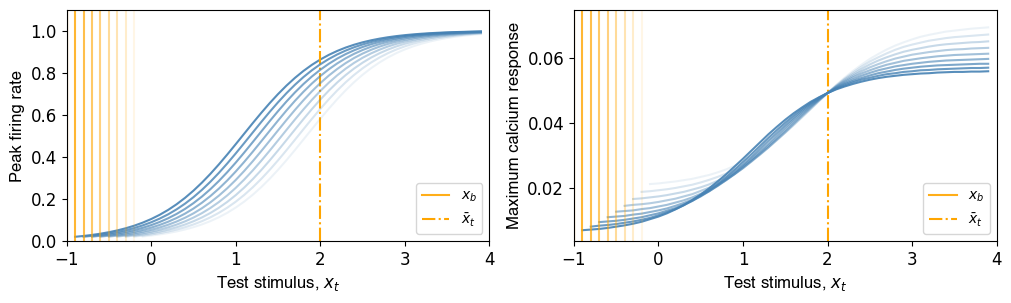

compression


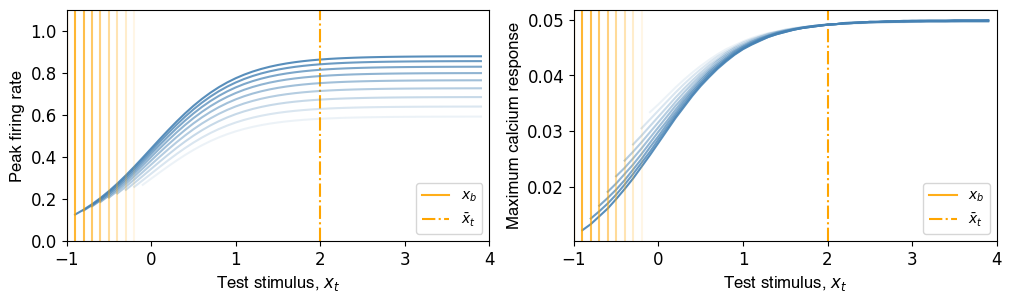

shift_y


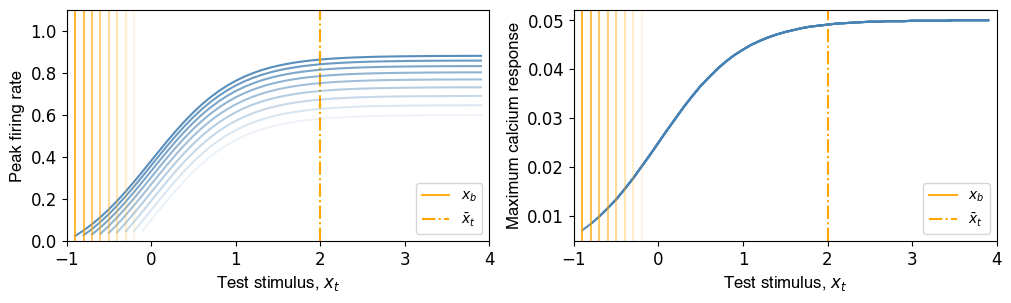

In [11]:
font = {'family': 'helvetica'}

#plt.rcParams['pdf.fonttype'] = 'truetype'
color_map = plt.cm.jet
norm = Normalize(vmin=0, vmax=7)
x_0_ = 2 # Initial stimulus

for par_case in np.array([0, 1, 2]): 
    print(string[par_case])
    x_b_array = np.arange(-1, 0, 0.1)

    fig, ax = plt.subplots(1, 2, figsize = (12,3))
    counter_plot = -1
    for x_b in x_b_array:
        counter_plot += 1
        counter_b = -1
        
        x_0_2_array = np.arange(x_b + 0.1, 2.*x_0_, 0.1) # Test stimulus
        Max_calcium = np.zeros(x_0_2_array.size)
        Max_rate = np.zeros(x_0_2_array.size)
        
        for x_0_2 in x_0_2_array: # Evaluating at stimuli larger than the background.
            counter_b += 1
            
            x0 = 0
            alpha = 1
            b = 0

            v_max_2 = v_max*Adapt_function(x_b, alpha, x0, b) # Response before adaptation for the background stimulus. 
            rb_or = v_max*Adapt_function(x_0_, alpha, x0, b) # Response before adaptation for the test stimulus. 

            if par_case == 0:  
                x0 = - np.arctanh( 2*(Adapt_function(x_0_, alpha, x0, b) - Adapt_function(x_b, alpha, x0, b)) - 1 ) + x_0_
                v_max_adapt = v_max*Adapt_function(x_0_2, alpha, x0, b) # Evaluation at x_0_2, now for the adapted response. 
            if par_case == 1:
                alpha = 1 - (Adapt_function(x_b, alpha, x0, b)/Adapt_function(x_0_, alpha, x0, b))
                v_max_adapt = v_max*Adapt_function(x_0_2, alpha, x0, b) # Evaluation at x_0_2, now for the adapted response. 
            if par_case == 2:
                b = Adapt_function(x_b, alpha, x0, b)
                v_max_adapt = v_max*Adapt_function(x_0_2, alpha, x0, b) # Evaluation at x_0_2, now for the adapted response. 

            
            Response = np.zeros(N_t)
            Response_inh = np.zeros(N_t)
            idx_stim = np.where(t_array==t_stim_adapt)[0][0] # At which the response decays to baseline
            idx_off = np.where(t_array==t_stim_off)[0][0] # At which the stimulus is turned-off
            Calcium_response = np.zeros(N_t)

            # Excitatory
            # Now we have a two step response: 
            ## 1. The background stimulus:

            R_t0 = -peak_firing # Starting at firing rate zero.
            Response[:idx_stim] = v_max_2*(R_t0*np.exp(-t_array[:idx_stim]/Tau_rate) + peak_firing)
            R_t0 = (Response[idx_stim-1]/v_max_2) - base  # Starting with the firing rate at time idx_stim
            Response[idx_stim:idx_off] = v_max_2*( R_t0*np.exp(-(t_array[idx_stim:idx_off] - t_array[idx_stim])/Tau_rate) + base )

            ## 2. The initial stimulus on top of the background:

            idx_stim_2 = np.where(t_array>=t_stim_off+0.1)[0][0] # At which the second stimulus is turned on
            idx_off_2 = np.where(t_array>=t_stim_off+t_stim_off)[0][0]

            R_t0 = (Response[idx_off-1]/v_max_adapt) - peak_firing
            Response[idx_off:idx_stim_2] = v_max_adapt*(R_t0*np.exp(-(t_array[idx_off:idx_stim_2] - t_array[idx_off])/Tau_rate) + peak_firing)
            R_t0 = (Response[idx_stim_2-1]/v_max_adapt) - base
            Response[idx_stim_2:idx_off_2] = v_max_adapt*( R_t0*np.exp(-(t_array[idx_stim_2:idx_off_2] - t_array[idx_stim_2])/Tau_rate) + base )
            R_t0 = Response[idx_off_2-1]/v_max_adapt
            Response[idx_off_2:] = v_max_adapt*( R_t0*np.exp(-(t_array[idx_off_2:] - t_array[idx_off_2])/Tau_rate)  )

            # INHIBITORY:
            # Now we have a two step response: 
            ## 1. The background stimulus:
            R_t0 = -peak_firing # Starting at firing rate zero.
            Response_inh[:idx_stim] = v_max_2*(R_t0*np.exp(-t_array[:idx_stim]/Tau_rate) + peak_firing)
            R_t0 = (Response_inh[idx_stim-1]/v_max_2) - base_ca  # Starting with the firing rate at time idx_stim
            Response_inh[idx_stim:idx_off] = v_max_2*( R_t0*np.exp(-(t_array[idx_stim:idx_off] - t_array[idx_stim])/Tau_rate) + base_ca )
            # Response[idx_off:] = (-np.exp(-t_array[idx_off]/Tau_rate) + base)*np.exp(-(t_array[idx_off:] - t_array[idx_off])/Tau_rate) 

            ## 2. The initial stimulus on top of the background:

            idx_stim_2 = np.where(t_array>=t_stim_off+0.1)[0][0] # At which the second stimulus is turned on
            idx_off_2 = np.where(t_array>=t_stim_off+t_stim_off)[0][0]

            R_t0 = (Response_inh[idx_off-1]/v_max_adapt) - peak_firing + (Response[idx_off-1] - Response_inh[idx_off-1])/v_max_adapt
            Response_inh[idx_off:idx_stim_2] = v_max_adapt*(R_t0*np.exp(-(t_array[idx_off:idx_stim_2] - t_array[idx_off])/Tau_rate) + peak_firing )
            R_t0 = (Response_inh[idx_stim_2-1]/v_max_adapt) - base_ca
            Response_inh[idx_stim_2:idx_off_2] = v_max_adapt*( R_t0*np.exp(-(t_array[idx_stim_2:idx_off_2] - t_array[idx_stim_2])/Tau_rate) + base_ca )
            R_t0 = Response_inh[idx_off_2-1]/v_max_adapt
            Response_inh[idx_off_2:] = v_max_adapt*( R_t0*np.exp(-(t_array[idx_off_2:] - t_array[idx_off_2])/Tau_rate)  )

            Calcium_response[:idx_off] = (Response[:idx_off] - Response_inh[:idx_off])
            Calcium_response[idx_off:-1] = Calcium_response[idx_off - 1] + (Response[idx_off+1:] - Response_inh[idx_off+1:])    

            Max_calcium[counter_b] = np.round(np.max(Calcium_response), decimals = 4)
            Max_rate[counter_b] = v_max_adapt
            
        ci = (counter_b+1)
        ax[0].plot(x_0_2_array, Max_rate, color = 'steelblue', alpha = 1-((counter_plot+1)*0.1))
        ax[0].set_xlabel(r"Test stimulus, $x_t$", fontsize = 12, fontdict=font)
        ax[0].set_ylabel("Peak firing rate", fontsize = 12, fontdict=font)
        ax[1].plot(x_0_2_array, Max_calcium, color = 'steelblue', alpha = 1-((counter_plot+1)*0.1))
        ax[1].set_xlabel(r"Test stimulus, $x_t$", fontsize = 12, fontdict=font)
        ax[1].set_ylabel("Maximum calcium response", fontsize = 12, fontdict=font)
        ax[0].axvline(x = x_b, color = 'orange', alpha = 1-((counter_plot+1)*0.1), linestyle = '-')
        ax[1].axvline(x = x_b, color = 'orange', alpha = 1-((counter_plot+1)*0.1), linestyle = '-')
        ax[0].set_xlim(-1, 4)
        ax[1].set_xlim(-1, 4)
        ax[0].set_ylim(0, 1.1)
        if counter_plot == 0:
            ax[1].axvline(x = x_b, color = 'orange', alpha = 1-((counter_plot+1)*0.1), linestyle = '-', label = r'$x_b$')
            ax[0].axvline(x = x_b, color = 'orange', alpha = 1-((counter_plot+1)*0.1), linestyle = '-', label = r'$x_b$')
            ax[0].axvline(x = x_0_, color = 'orange', linestyle = '-.', label = r'$\bar{x}_t$')
            ax[1].axvline(x = x_0_, color = 'orange', linestyle = '-.', label = r'$\bar{x}_t$')
        ax[0].legend(fontsize = 12, prop=font)
        ax[1].legend(fontsize = 12, prop=font)
        ax[0].tick_params(labelsize = 12)
        ax[1].tick_params(labelsize = 12)
#     plt.savefig("Figures/FiringRate_and_Calcium_"+str(string[par_case])+"_adaptation.pdf", bbox_inches = 'tight', dpi = 300)
    plt.show()

### Stochastic responses of PNs in background adapted conditions

In [12]:
def Prob(x, sigma, s0):
    return 1/(np.sqrt(2*np.pi*sigma**2))*np.exp( -(x - s0)**2/(2*sigma**2) )

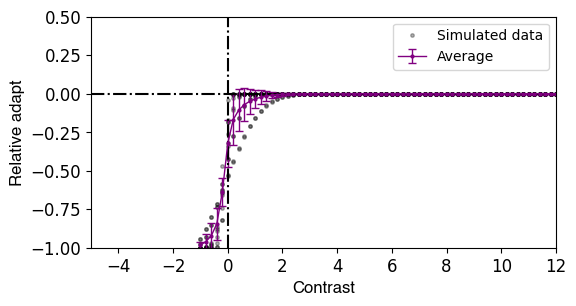

In [14]:
plt.figure(figsize = (6, 3))
font = {'family': 'helvetica'}
plt.rcParams['pdf.fonttype'] = 'truetype'

s_array =  np.arange(-5, 5,0.1) # Stimulus array
sigma = 0.5
#s_back_array = np.arange(-3, 4, 0.2)
s_back_array = np.array([-4, -3, -2, -1, -0.5, 0.5, 1, 2, 3, 4])
N_back = s_back_array.size

alpha = 1
b = 0
x0 = -3

contrast_array = np.arange(-1, 15, 0.2)
contrast_array_ = np.arange(-1, 15, 0.5)
dif_curve_ = np.zeros((N_back, contrast_array.size))
for i_b in range(N_back):
    s_back = s_back_array[i_b]
    s_array = contrast_array*s_back + s_back
    weight = Prob(s_array, sigma, s_back)
    weight = np.cumsum(weight)/np.max(np.cumsum(weight))

    r = Adapt_function(s_array, alpha, x0, b)
    r_adapt = r*weight 
    
    #dif_curve = ( -r + r_adapt)/(0.5*(r_adapt+1))
    dif_curve = ( -r + r_adapt)/(0.5*(r+1))
    dif_curve_[i_b, :] = np.copy(dif_curve)
    
    plt.plot(contrast_array, dif_curve, alpha = 0.3, linestyle = 'none', marker = '.', markersize = 5, color = 'k')
plt.plot(contrast_array, dif_curve, alpha = 0.3, linestyle = 'none', marker = '.', markersize = 5, color = 'k', label = 'Simulated data')
plt.errorbar(contrast_array, np.mean(dif_curve_, axis = 0), yerr = np.std(dif_curve_, axis = 0), color = 'purple', linewidth = 1, marker = '.', markersize = 4, capsize = 3, label = 'Average')
plt.xlim(-5, 12)
plt.ylim(-1, 0.5)
plt.axhline(y = 0, linestyle = '-.', color = 'k')
plt.axvline(x = 0, linestyle = '-.', color = 'k')
plt.xlabel("Contrast", fontsize = 12, fontdict=font)
plt.ylabel("Relative adapt", fontsize = 12, fontdict=font)
plt.tick_params(labelsize = 12)
plt.legend(fontsize = 10)
#plt.savefig("Figures/PN_RelativeAdapt_.pdf", bbox_inches = 'tight', dpi = 300)
plt.show()
